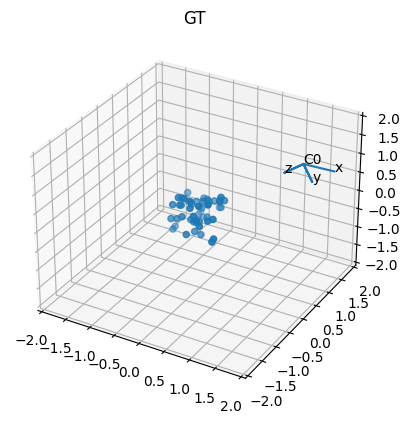

In [23]:
# Synthetic data

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2

T = 50

def lookat(pos, eye, up):
    t_cw = eye - pos
    ez = t_cw / np.linalg.norm(t_cw)
    ey = -up / np.linalg.norm(up)
    ex = np.cross(ez, up)
    R_cw = np.array([ex, ey, ez])
    return R_cw.T, pos

def lookati(pos, eye, up):
    ez = eye - pos
    ez = ez / np.linalg.norm(ez)
    ex = np.cross(ez, up)
    ex = ex / np.linalg.norm(ex)
    ey = np.cross(ez, ex)
    ey = ey / np.linalg.norm(ey)
    R_c2w = np.array([ex, ey, ez])
    return R_c2w.T, pos

def plot_cam(ax, R_c2w, t_c2w, name=None, scale=0.5):
    ex = R_c2w[:,0] * scale + t_c2w
    ey = R_c2w[:,1] * scale + t_c2w
    ez = R_c2w[:,2] * scale + t_c2w
    p = np.array([ex, t_c2w, ey, t_c2w, ez, t_c2w])
    ax.plot(p[:,0], p[:,1], p[:,2])
    ax.text(p[0,0], p[0,1], p[0,2], 'x')
    ax.text(p[2,0], p[2,1], p[2,2], 'y')
    ax.text(p[4,0], p[4,1], p[4,2], 'z')
    if name is not None:
        ax.text(p[1,0], p[1,1], p[1,2], name)

# GT cameras in C2W
R1_gt, t1_gt = lookat(np.array([2, 0, 2]), np.array([0, 0, 0]), np.array([np.cos(1 * np.pi), np.sin(0.5 * np.pi), np.sin(0.1 * np.pi)]))
# GT positions (T x 3 matrix)
X_gt = np.random.rand(T, 3) - 0.5

# GT intrinsics
K1_gt = np.array([[ 640, 0, 320], [0,  640, 240], [0, 0, 1]], dtype=np.float64)
K2_gt = np.array([[1280, 0, 640], [0, 1280, 360], [0, 0, 1]], dtype=np.float64)
K3_gt = np.array([[1920, 0, 960], [0, 1920, 540], [0, 0, 1]], dtype=np.float64)

# GT position observations (T x 3 matrix)
x1_gt = (X_gt @ R1_gt - R1_gt.T @ t1_gt) @ K1_gt.T

# verify z>0
assert np.sum(x1_gt[:,2] < 0) == 0

x1_gt = x1_gt / x1_gt[:,2][:,None]


# Visualize
def visualize(R_list, t_list, v, title):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    for i, (R, t) in enumerate(zip(R_list, t_list)):
        plot_cam(ax, R, t, name=f'C{i}')

    ax.scatter3D(v[:,0], v[:,1], v[:,2])
    ax.set_xlim3d(-2, 2)
    ax.set_ylim3d(-2, 2)
    ax.set_zlim3d(-2, 2)
    ax.set_title(title)
    plt.show()

visualize([R1_gt], [t1_gt], X_gt, 'GT')

In [20]:
R, t = lookat(np.array([2, 0, 2]), np.array([0, 0, 0]), np.array([np.cos(1 * np.pi), np.sin(0.5 * np.pi), np.sin(0.1 * np.pi)]))
R, t

(array([[ 0.48847467, -0.69080751, -0.70710678],
        [ 0.63942165,  0.69080751,  0.        ],
        [-0.48847467,  0.21347126, -0.70710678]]),
 array([2, 0, 2]))

In [22]:
R, t = lookati(np.array([2, 0, 2]), np.array([0, 0, 0]), np.array([np.cos(1 * np.pi), np.sin(0.5 * np.pi), np.sin(0.1 * np.pi)]))
R, t

(array([[ 0.51892763,  0.48032709, -0.70710678],
        [ 0.67928509, -0.73387449,  0.        ],
        [-0.51892763, -0.48032709, -0.70710678]]),
 array([2, 0, 2]))